<a href="https://colab.research.google.com/github/Wezz-git/AI-samples/blob/main/Multivariate_LSTM_(Google).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Target - $GOOGL

features (all 'Close' prices) GOOGL, ^IXIC(NASDAQ Index), AMZN

lookback period = 60 days

In [1]:
# add the libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error

In [3]:
# 1 - Load the target and features

tickers = ['GOOGL', '^IXIC', 'AMZN']
start_date = '2010-01-01'

print("Downloading multivariate data...")

data = yf.download(tickers, start=start_date)

# 2 - Isolate the 'Close'  and drop any NaN rows / Clean data

prices = data['Close'].copy()
prices = prices.dropna()

# 3 - Check the work
print(prices.head())
print(prices.info())

/tmp/ipython-input-310328663.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date)
[*********************100%***********************]  3 of 3 completed

Ticker        AMZN      GOOGL        ^IXIC
Date                                      
2010-01-04  6.6950  15.576998  2308.419922
2010-01-05  6.7345  15.508402  2308.709961
2010-01-06  6.6125  15.117455  2301.090088
2010-01-07  6.5000  14.765527  2300.050049
2010-01-08  6.6760  14.962370  2317.169922
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3993 entries, 2010-01-04 to 2025-11-14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    3993 non-null   float64
 1   GOOGL   3993 non-null   float64
 2   ^IXIC   3993 non-null   float64
dtypes: float64(3)
memory usage: 124.8 KB
None


/tmp/ipython-input-2280370474.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date)
[*********************100%***********************]  3 of 3 completed


--- Data Prep Complete ---
X_train shape: (3135, 60, 3)
y_train shape: (3135,)
multivariate LTSM model being built


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0119
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.8871e-04
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.9210e-04
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.0174e-04
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.7538e-04
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.0537e-04
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.2188e-04
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.6624e-04
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.8408e-04
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Root Mean Squared Error (RMSE): $27.38


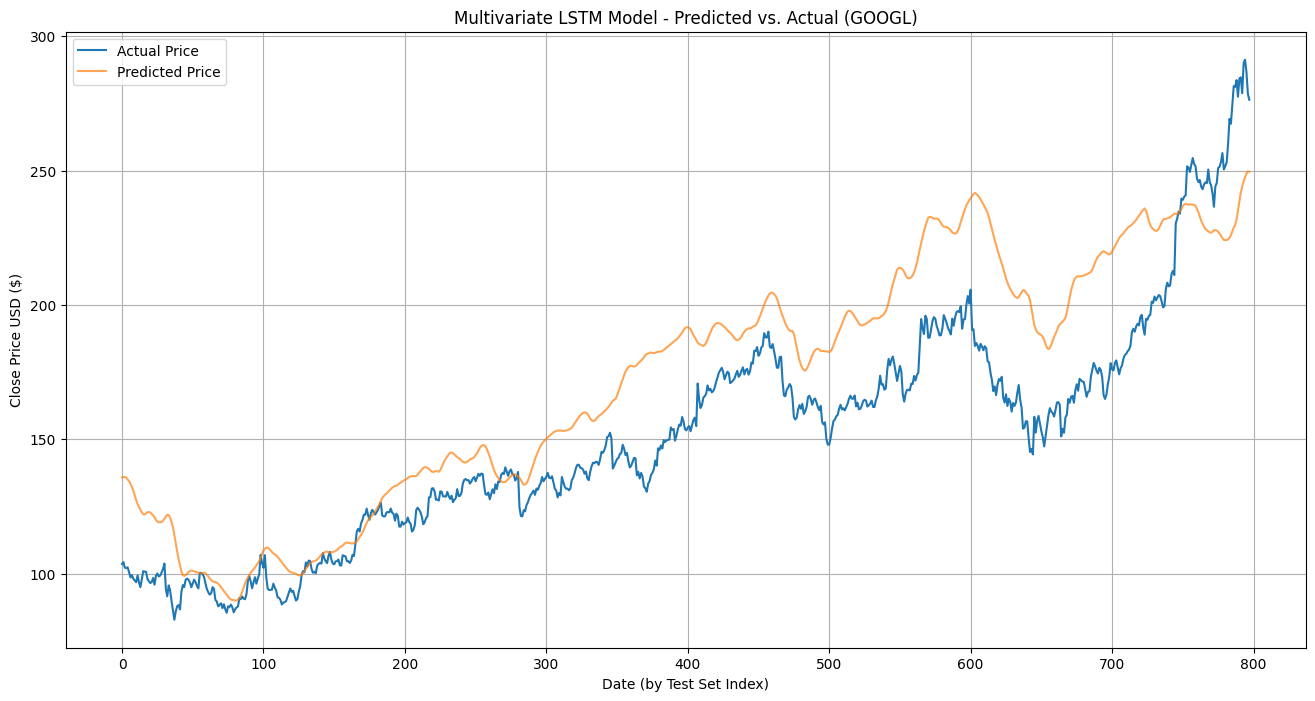

In [5]:
# 1 - Load the target and features

tickers = ['GOOGL', '^IXIC', 'AMZN']
start_date = '2010-01-01'

print("Downloading multivariate data...")

data = yf.download(tickers, start=start_date)

# 2 - Isolate the 'Close' rpcies and drop any NaN rows

prices = data['Close'].copy()
prices = prices.dropna()

# 3.1 - Scale the MinMaxScaler of all columns

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(prices)

# 3.2 - Prepare the data 'Window'
# This section re-creates X_train and y_train from scratch
# Create your X_train, y_train, X_test, and y_test "flashcards" (use a 60-day lookback).

lookback_period = 60
training_data_len = int(np.ceil(len(scaled_data) * .8))    # Train 80% of the data

train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - lookback_period:, :]

X_train = []
y_train = []

for i in range(lookback_period, len(train_data)):
    X_train.append(train_data[i - lookback_period:i, :])   # All 3 features
    y_train.append(train_data[i, 0])                        # Just the Google price

X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = prices['GOOGL'][training_data_len:].values

for i in range(lookback_period, len(test_data)):
    X_test.append(test_data[i-lookback_period:i, :])
X_test = np.array(X_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 3))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 3))

print(f"--- Data Prep Complete ---")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# 4 - (Build) Create a sequential LTSM model

# 4.1 - Build the LTSM model
print("multivariate LTSM model being built")
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 3)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# 4.2 - Compile and train model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=10)


# 4.3 - Make the predictions
predictions = model.predict(X_test)

# 4.4 - Unscale the predictions
dummy_array = np.zeros((len(predictions), 3))
dummy_array[:, 0] = predictions.flatten()
unscaled_data = scaler.inverse_transform(dummy_array)
unscaled_predictions = unscaled_data[:, 0]

# 4.5 - Evaluate the RMSE model
rmse = np.sqrt(mean_squared_error(y_test, unscaled_predictions))
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

# 4.6 - Plot the results
plot_df = pd.DataFrame({
    'Actual' : y_test.flatten(),
    'Predicted' : unscaled_predictions.flatten()
})
plt.figure(figsize=(16, 8))
plt.title('Multivariate LSTM Model - Predicted vs. Actual (GOOGL)')
plt.xlabel('Date (by Test Set Index)')
plt.ylabel('Close Price USD ($)')
plt.plot(plot_df['Actual'], label='Actual Price')
plt.plot(plot_df['Predicted'], label='Predicted Price', alpha=0.7)
plt.legend()
plt.grid()
plt.show()